<a href="https://colab.research.google.com/github/DiegoPretelt/DS-2002/blob/main/API_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AAPL


[*********************100%***********************]  1 of 1 completed


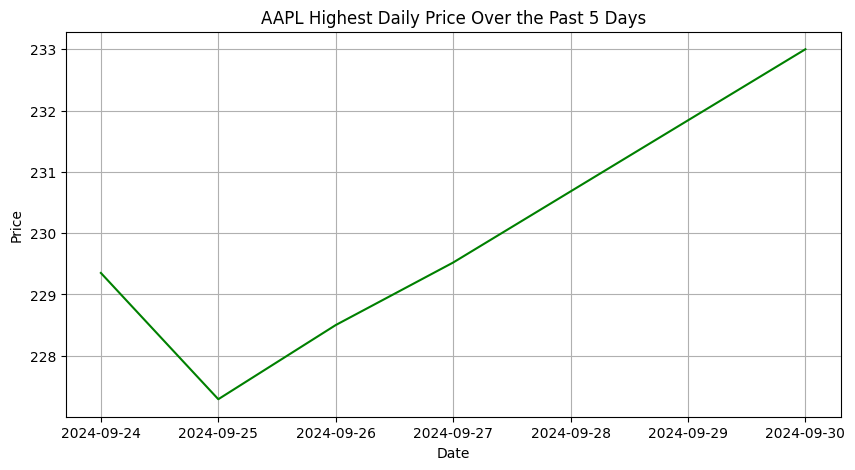

,Ticker:,Full Name:,Price:$,Target Mean Price,52-Week High:$,52-Week Low:$,Trending Stocks
0,AAPL,Apple Inc.,233.0,240.58,237.23,164.08,STLA
1,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
2,NaN,NaN,NaN,NaN,NaN,NaN,CGC
3,NaN,NaN,NaN,NaN,NaN,NaN,CCL
4,NaN,NaN,NaN,NaN,NaN,NaN,XHG


In [14]:
import json
import pandas as pd
import json
import requests
import yfinance as yf
import matplotlib.pyplot as plt

stock = input();

apikey = "tcJLa1dmk7PigCK6PLog6ovKWKFQimz2cAPzzRxj"
url = "https://yfapi.net/v6/finance/quote"
url_2 = "https://yfapi.net/v1/finance/trending/US"
url_3 = f"https://yfapi.net/v11/finance/quoteSummary/{stock}"

querystring = {"symbols":stock}
headers = {'x-api-key': apikey} #all corresponding to url 1
response = requests.request("GET", url, headers=headers, params=querystring)
stock_json = response.json()

querystring = {"symbols":stock, "modules":"financialData"}
headers = {'x-api-key': apikey} #all corresponding to url 3
response = requests.request("GET", url_3, headers=headers, params=querystring)
avg_json = response.json()


#checking if targetMeanPrice exists before accessing it
if 'quoteSummary' in avg_json and avg_json['quoteSummary']['result'] and \
   'financialData' in avg_json['quoteSummary']['result'][0] and \
   'targetMeanPrice' in avg_json['quoteSummary']['result'][0]['financialData']:
    target_mean_price = str(avg_json['quoteSummary']['result'][0]["financialData"]['targetMeanPrice']['raw'])
else:
    target_mean_price = "N/A"  # Set to N/A if data is not available


#Has Ticker Name, Full Name of the Stock, Current Market Price, Target Mean Price, 52 week high, 52 week low
full_info = {
      "Ticker: ":  str(stock_json['quoteResponse']['result'][0]["symbol"] ),

      " Full Name: ":  str(stock_json['quoteResponse']['result'][0]["longName"]) ,

      " Price:$": str(stock_json['quoteResponse']['result'][0]["regularMarketPrice"]) ,

      " Target Mean Price": target_mean_price,

      " 52-Week High:$":  str(stock_json['quoteResponse']['result'][0]["fiftyTwoWeekHigh"]) ,

      " 52-Week Low:$": str(stock_json['quoteResponse']['result'][0]["fiftyTwoWeekLow"])
      }
#top 5 trending
#------------------------------------------------------------------------------



querystring = {"symbols":stock}
headers = {'x-api-key': apikey}
response = requests.request("GET", url_2, headers=headers, params=querystring)
response = requests.request("GET", url_2, headers=headers)
trending_json = response.json()

trending_stocks = []
for i in range(5):
    trending_stocks.append(trending_json['finance']['result'][0]['quotes'][i]['symbol'])

# Display trending stocks
#print(full_info)
#print("5 Trending Stocks: " + ", ".join(trending_stocks))

df_stock_info = pd.DataFrame([full_info])
df_trending = pd.DataFrame({"Trending Stocks": trending_stocks})

final = pd.concat([df_stock_info, df_trending], axis=1)



#----------------------------------------------------------------------------
#PLotting using matplot

data = yf.download(stock, period="5d")

plt.figure(figsize=(10, 5))
plt.plot(data["High"], color='green')
plt.title(f"{stock} Highest Daily Price Over the Past 5 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

#show the dataframe
display(final)
#df to csv
final.to_csv('final.csv', index=False)
